### Task1- Import Libraries

In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task2- Download dataset from Kaggle

In [26]:
#set kaggle API credentials
#import os
#os.environ['KAGGLE_USERNAME']='sawan7sal'
#os.environ['KAGGLE_KEY']= '320b01a19299097f422bab09ff04a5e9'

In [27]:
#download dataset
#! Kaggle datasets download -d uciml/breast-cancer-wisconsin-data

In [28]:
#unzip file
#! unzip /content/breast-cancer-wisconsin-data.zip

### Task3- Load & Explore Data

In [29]:
df = pd.read_csv('Breast Cancer Wisconsin.csv')

In [30]:
#display dataframe
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

##### Insights:
1. ID is an identifier
2. Diagnosis is Depenedent variable with values B and M.
3. There are 10 variables related to the cell and they have 3 different categories: Mean, Standard Error (SE) and Worse. 

In [31]:
#count of rows and columns
df.shape

(569, 33)

In [32]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [33]:
#count number of null(empty) values
df.info()
#df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Insights:
1. "Unnamed: 32" doesn't have any values and should be dropped.
2. Better to convert the values of 'M' to '1' and 'B' to '0'. 

In [34]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [35]:
# Drop the column with null values
df = df.drop('Unnamed: 32', axis=1)

In [36]:
# count of rows and columns
df.shape

(569, 32)

In [37]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

##### Insights: The data is not unbalanced in terms of the dependent variable. 

### Task4- Data Visualization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

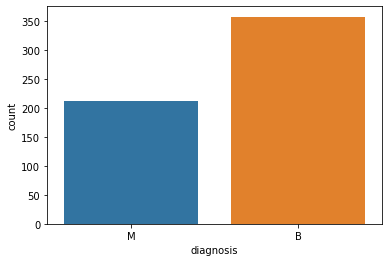

In [38]:
sns.countplot(data =df,x = df['diagnosis'], label = 'count')

In [39]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

<AxesSubplot:>

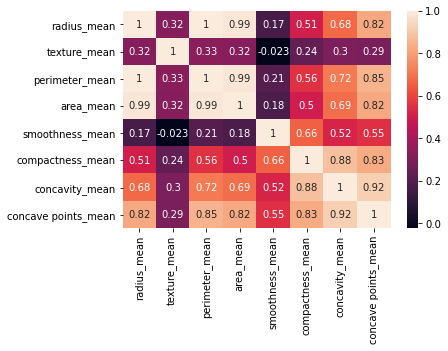

In [40]:
# Correlation between first 10 numeric variables
sns.heatmap(df.iloc[:,1:10].corr(),annot = True)

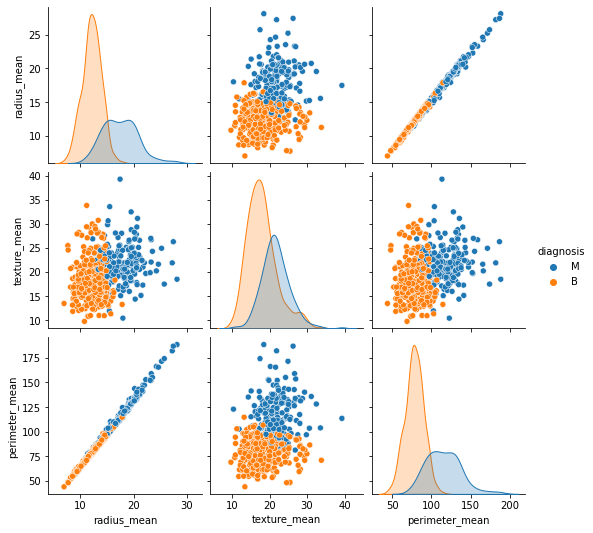

In [41]:
# Pairwise relationships between variables within the dataset 
# Taking first 5 variables 
sns.pairplot(df.iloc[:,1:5],hue = 'diagnosis')

##### Insights:
1. Malignant cells averages are generally higher than Benign cell averages

In [93]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

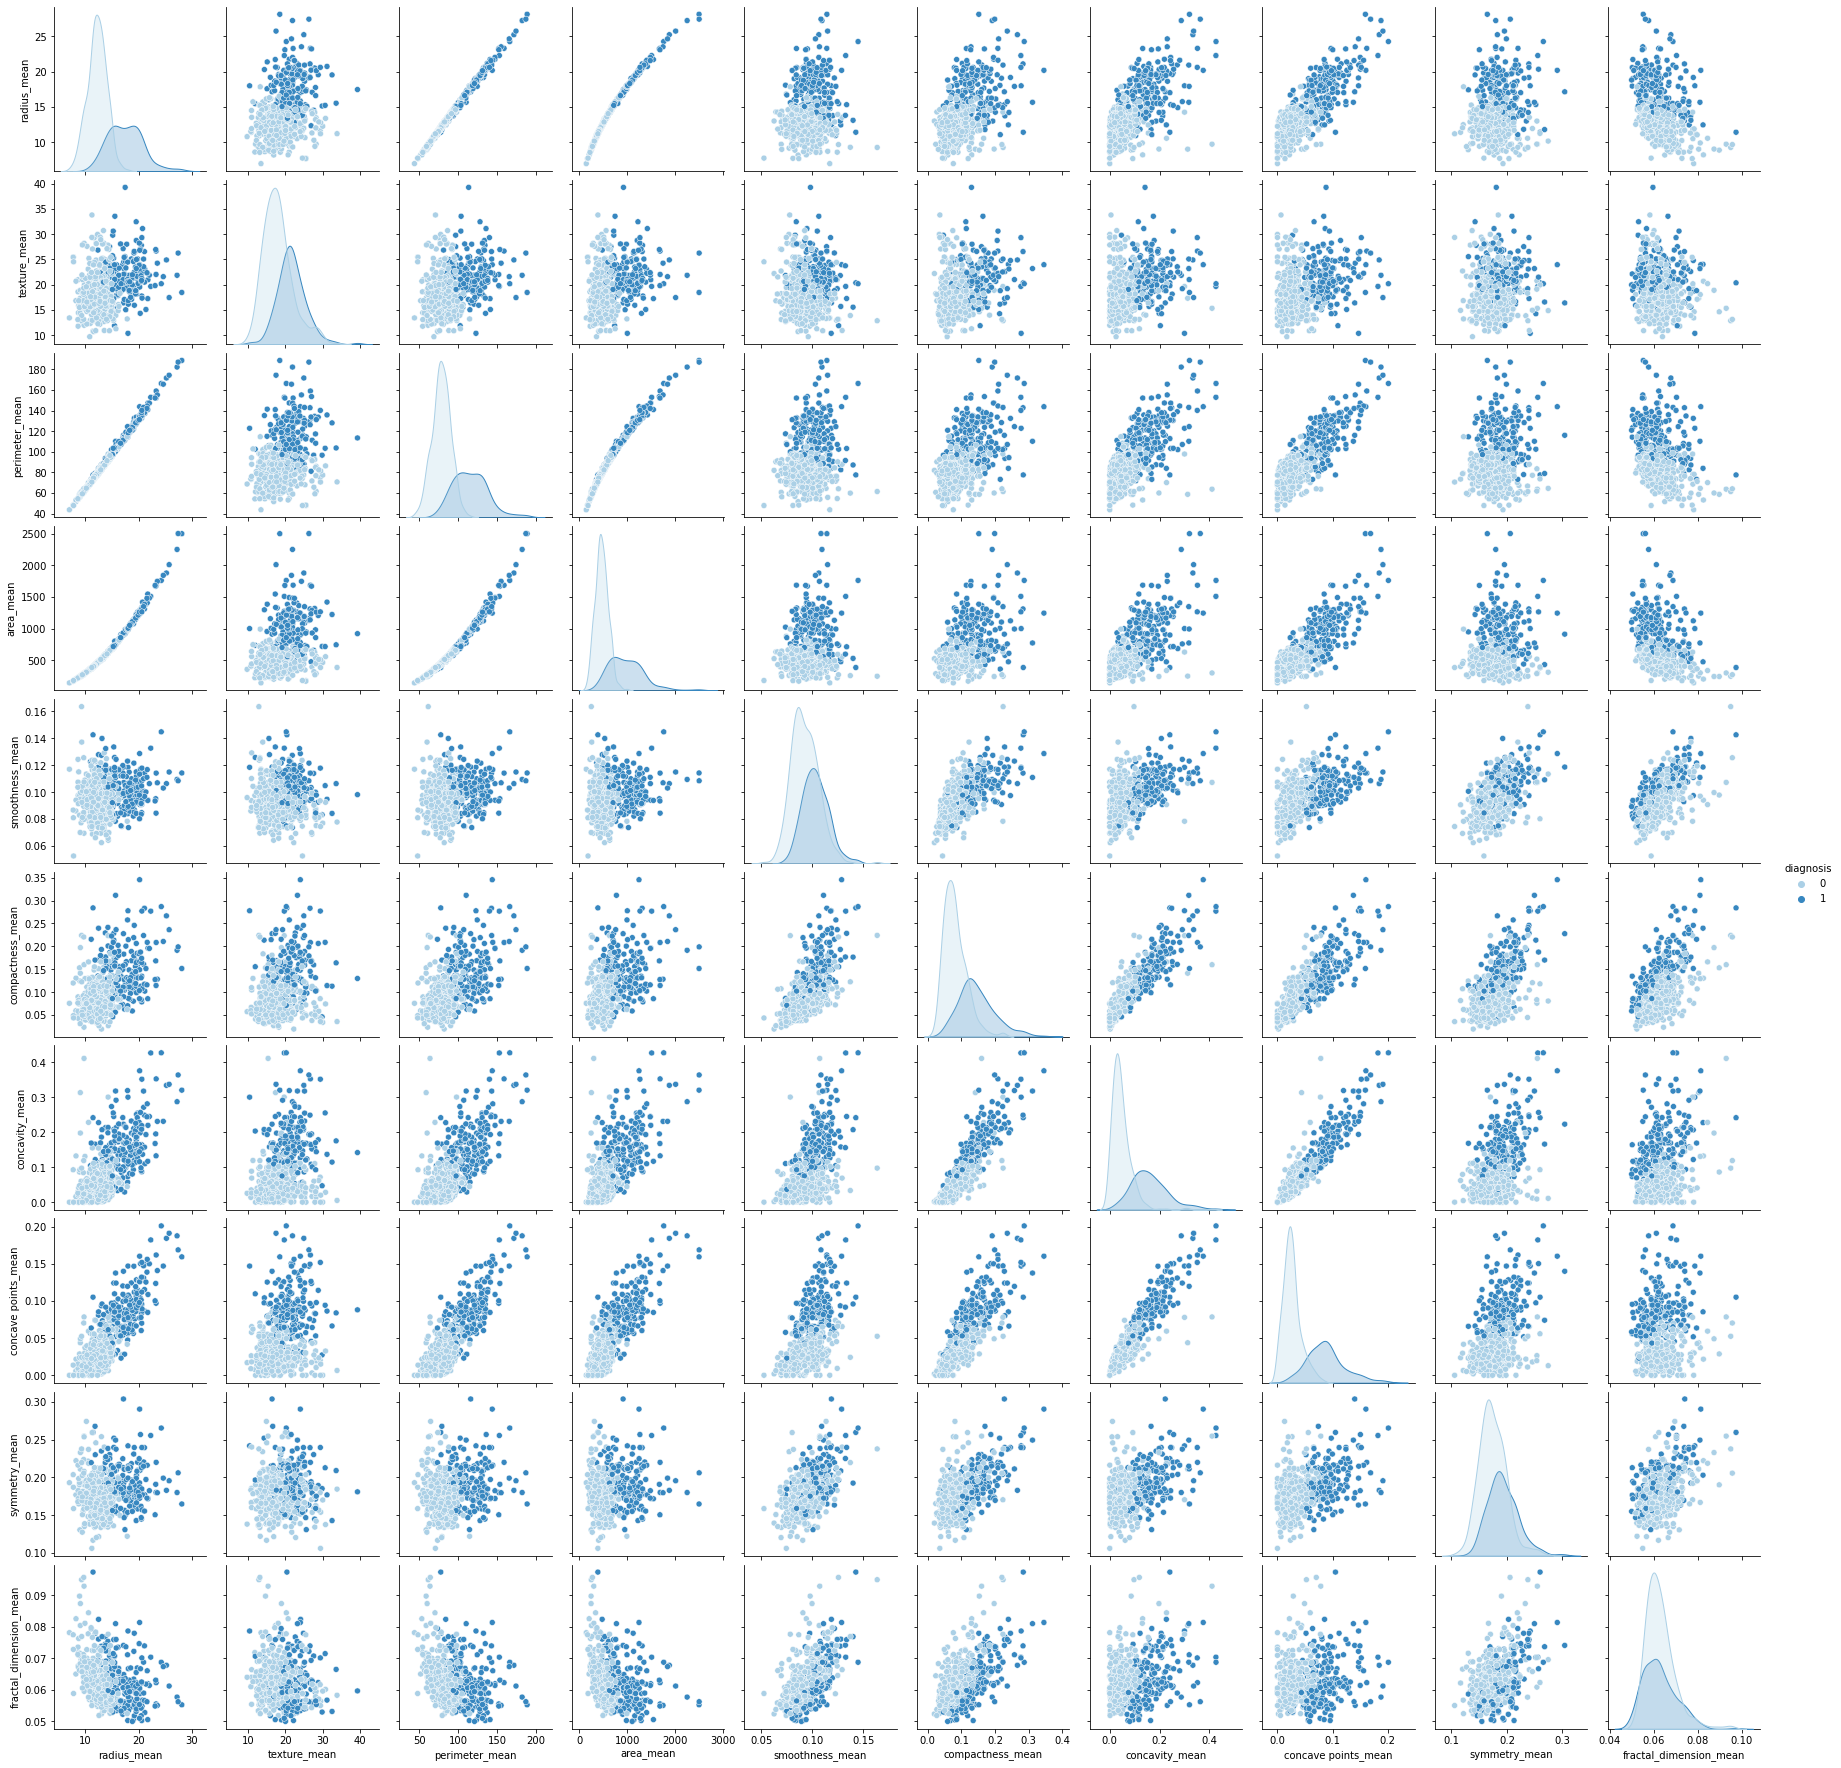

In [94]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

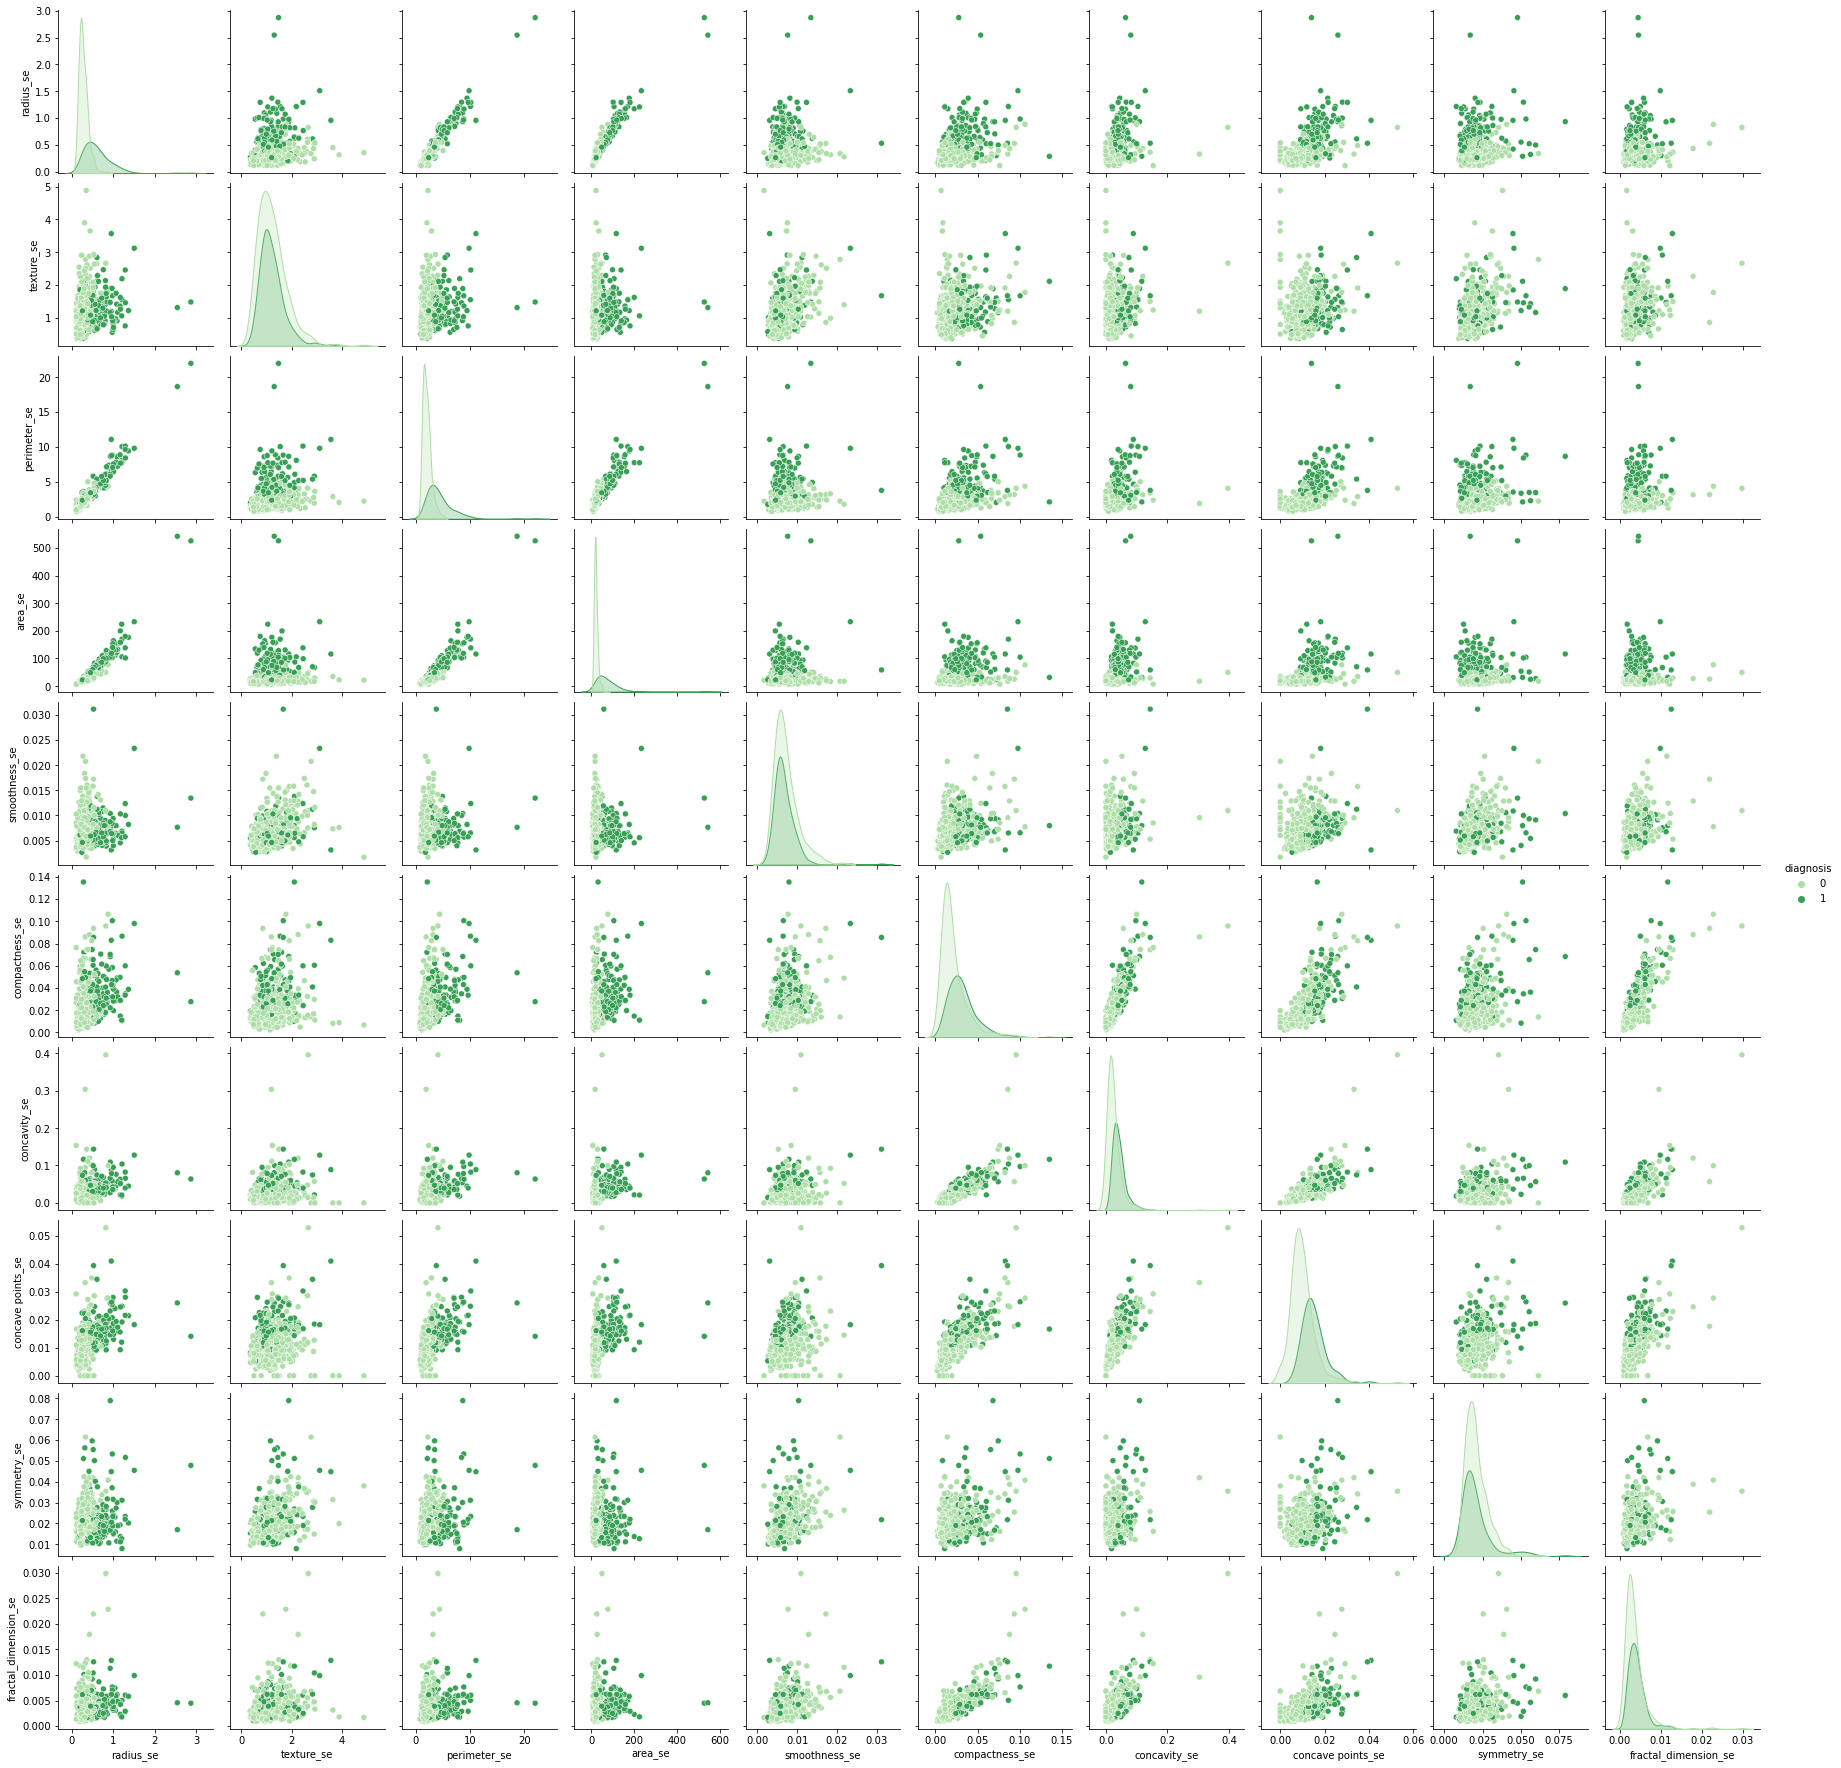

In [95]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

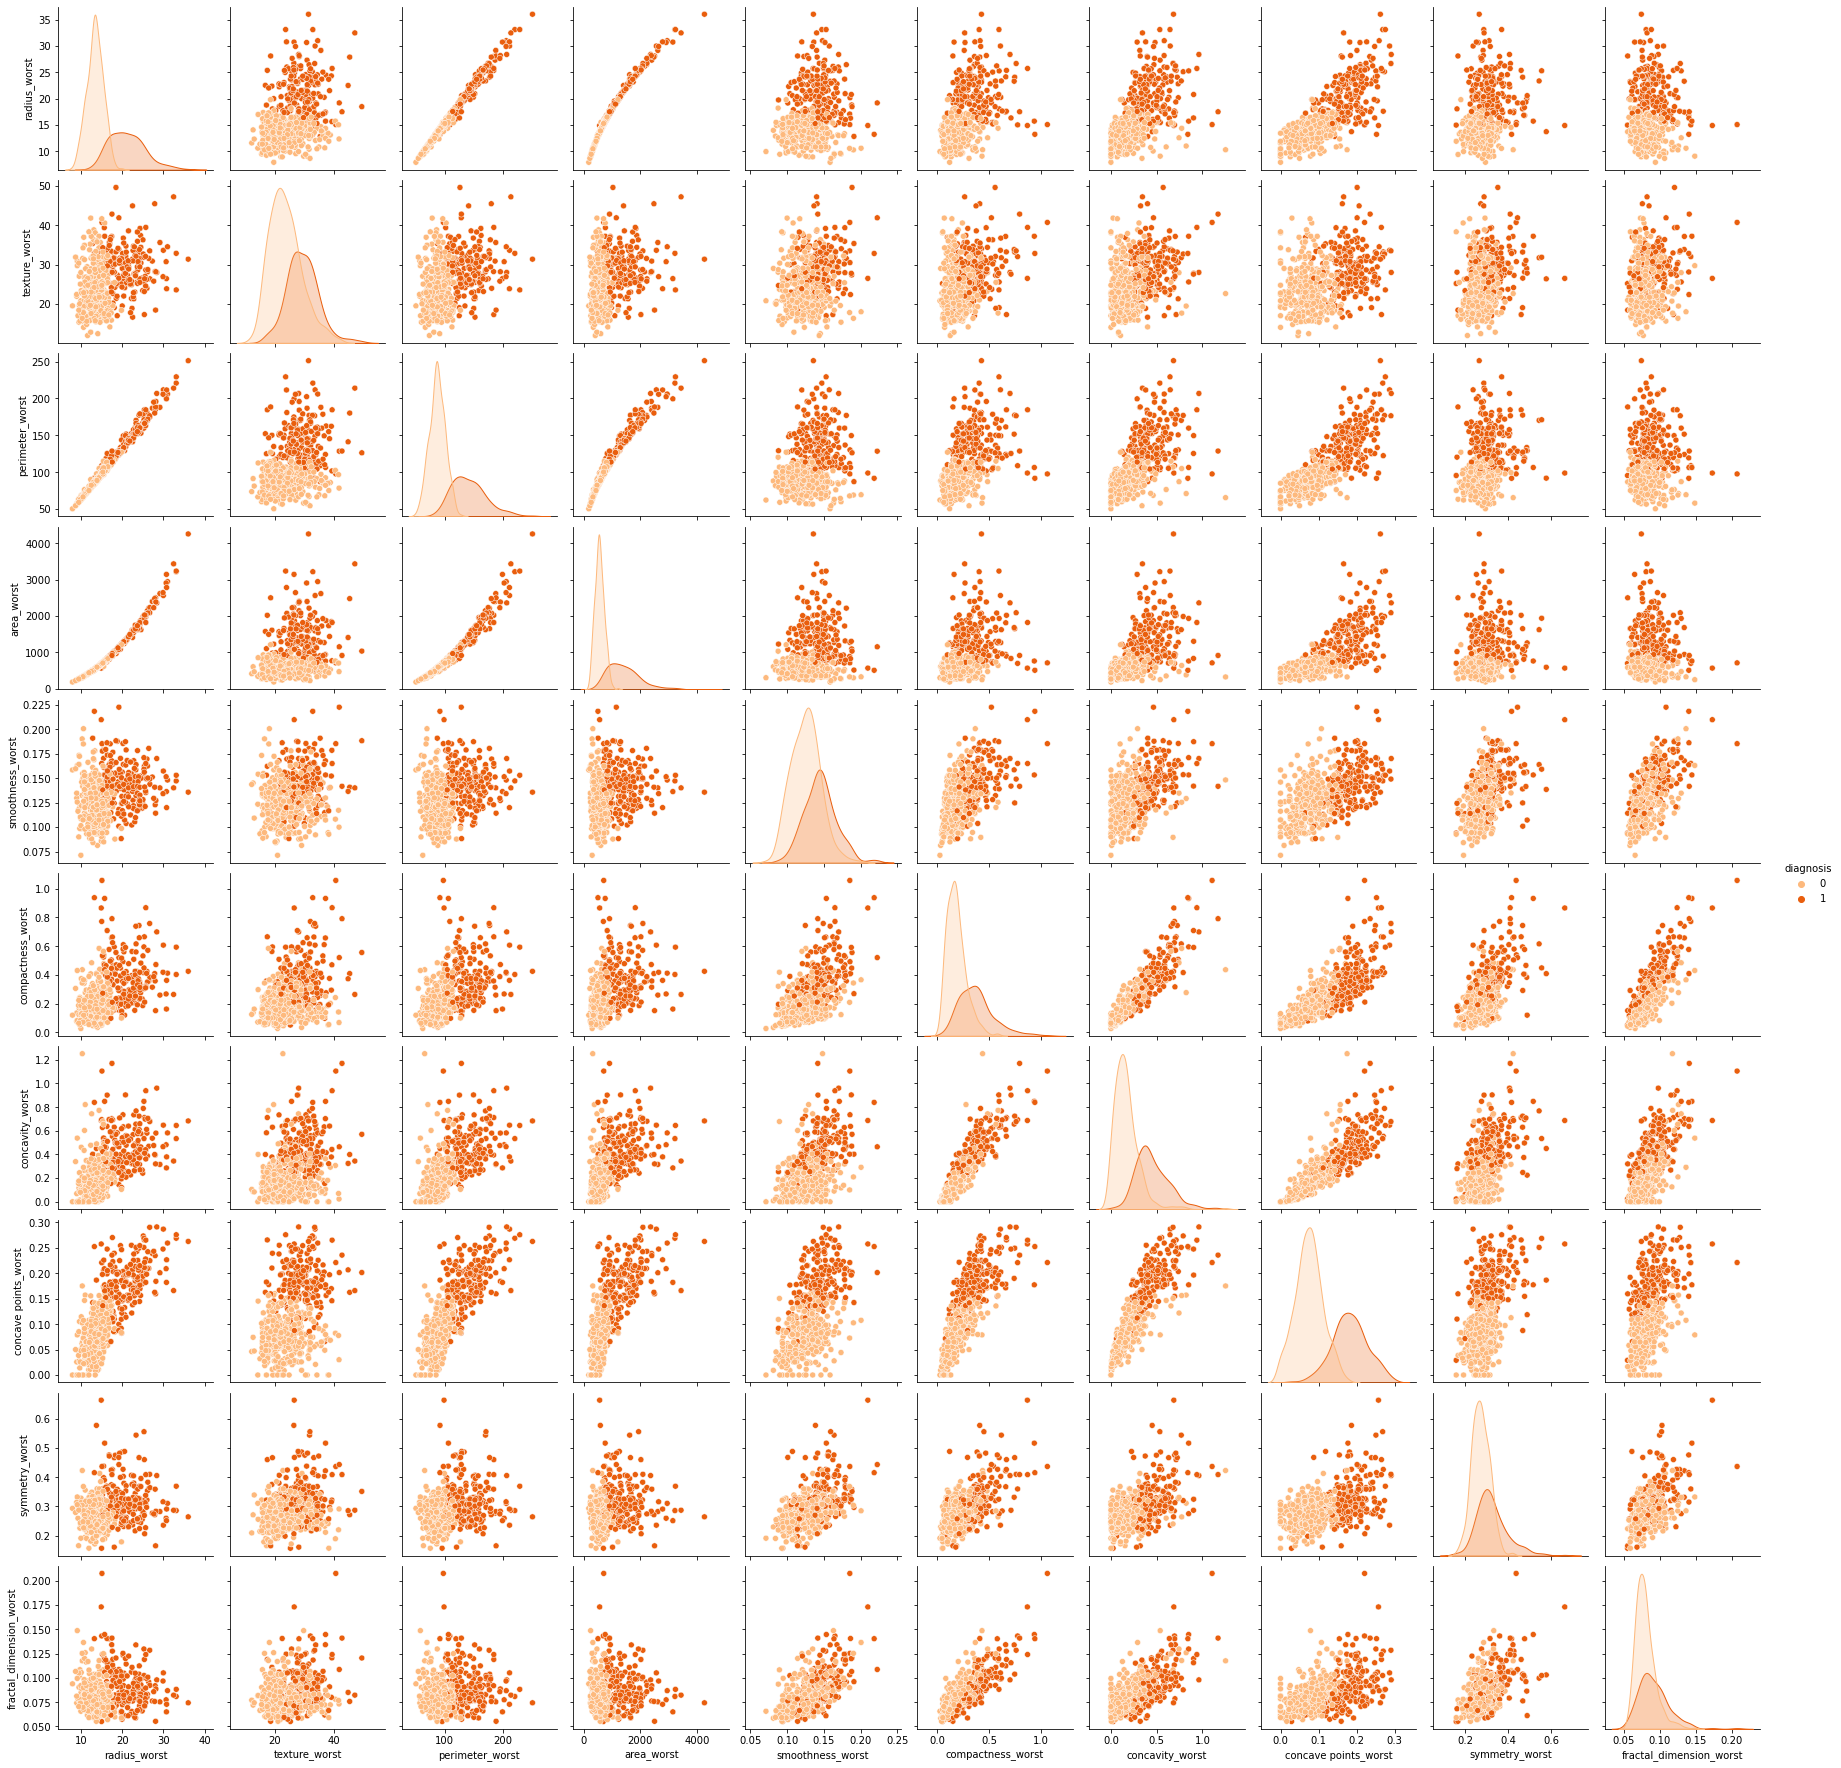

In [96]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

### Task5- Label Encoding

In [42]:
# Check the diagnosis column for encoding values
df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [43]:
# Encoding method-1
#df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [44]:
# Encoding method-2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.iloc[:,1] = lb.fit_transform(df.iloc[:,1].values)

In [45]:
#display df
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [46]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Task6- Split Dataset & Feature Scaling

In [47]:
#Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values   # Removing ID and Diagnosis columns
y = df['diagnosis']

In [48]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [49]:
X.shape, y.shape

((569, 30), (569,))

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Splitting datasets into training(75%) and testing(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [53]:
y_train.shape, y_test.shape

((426,), (143,))

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
#Scaling the data(feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [56]:
#print scaled data
X_train_scaled[:2]

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, -0.27587995,  1.07807258,
         0.86354605,  0.72631375,  0.89844062,  1.17876963,  1.47437716,
        -0.04022275, -0.50962253,  0.10947722, -0.13472838, -0.52489487,
        -0.14934475,  0.07460028,  0.23747244, -0.43028253,  0.08289146,
         0.04148684,  0.68989862,  0.19412774, -0.05193356,  1.12941497,
         0.92394223,  1.22221738,  1.43655962,  1.14955889,  1.56911143]])

In [57]:
#print data unscaled data
X_train[:2]

array([[1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
        2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
        1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
        1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
        9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
        1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
        3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
        1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
        1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01]])

In [58]:
X_test_scaled = scaler.fit_transform(X_test)

In [59]:
#print scaled data
X_test_scaled[:2]

array([[-0.47853809, -0.21371678, -0.45835473, -0.51137989,  0.06357125,
        -0.07118487, -0.15348321, -0.34424151,  0.27556283,  0.05593454,
        -0.07344301, -0.35000951, -0.21139892, -0.2884524 , -0.03750952,
        -0.39680914, -0.12138724, -0.2182742 , -0.31969493, -0.09710257,
        -0.2951985 , -0.23906872, -0.35118366, -0.38408577,  0.31787844,
        -0.20250792, -0.07876076, -0.27372978,  0.07289581,  0.09152022],
       [ 1.37424404,  0.38950001,  1.29239853,  1.40549685, -0.61597356,
        -0.12272543,  0.18407864,  0.65628651, -0.91339576, -1.34582552,
         1.51220589, -0.7809472 ,  1.46844143,  1.49166129, -0.96308909,
        -0.55060914, -0.26226971,  0.35477048, -0.76008921, -0.84449086,
         1.6908932 ,  0.06118229,  1.63882917,  1.6610866 , -0.77848217,
        -0.22617683, -0.07193689,  0.84579664, -0.67110896, -1.02766663]])

### Task7- Build a Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# build a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [62]:
# make use of trained model to make predictions on test data
y_prediction = classifier.predict(X_test_scaled)

In [63]:
y_prediction.shape

(143,)

In [64]:
y_prediction[:5]

array([0, 1, 1, 0, 0])

# Performance Evaluation

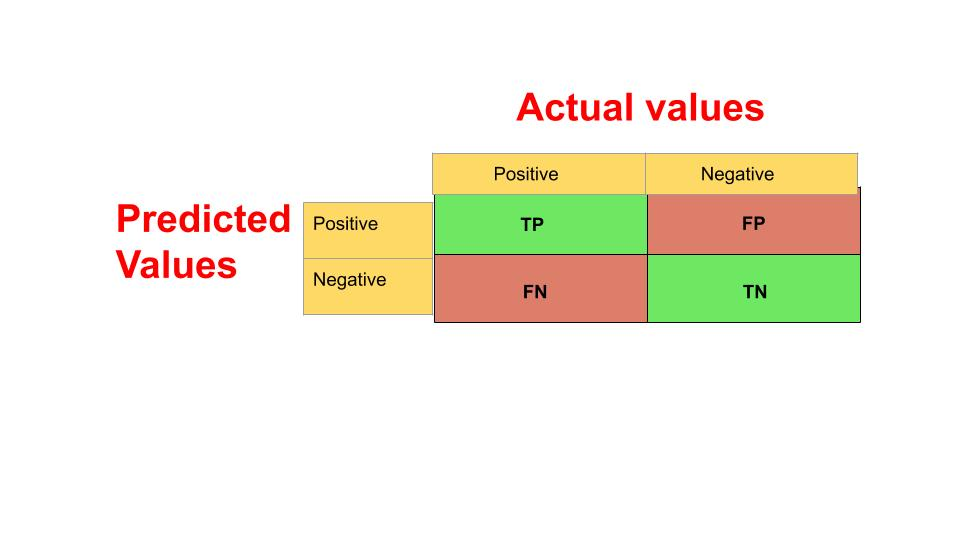

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
#plot confusion matrix
con_mat = confusion_matrix(y_test,y_prediction)
con_mat

array([[89,  0],
       [ 2, 52]], dtype=int64)

<AxesSubplot:>

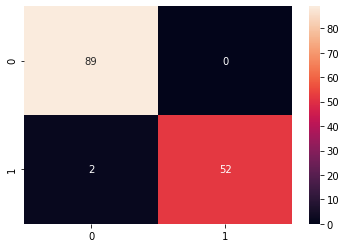

In [67]:
sns.heatmap(con_mat, annot=True)

In [68]:
#get accuracy score for model
accuracy_score(y_test,y_prediction)

0.986013986013986

In [69]:
# get classification report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



### Task8- Build a Logistic Regression Model with Hyperparameters tuning

Unlike the parameters of a model, which are learned from the data during training, hyperparameters are not. They are often set manually, or by using techniques like Grid Search or Random Search.

Let's break down the hyperparameters we are tuning in our Logistic Regression model:

1. solver: This is the algorithm to use in the optimization problem. Options include 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. Each solver has its strengths and weaknesses. For example, 'liblinear' is a good choice for small datasets, while 'sag' and 'saga' are faster for large ones.


2. penalty: This is used to specify the norm used in the penalization. The 'newton-cg', 'sag' and 'lbfgs' solvers support only 'l2' penalties. 'elasticnet' is only supported by the 'saga' solver. If 'none' (not supported by the liblinear solver), no regularization is applied.


3. C: This is the inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


4. max_iter: Maximum number of iterations taken for the solvers to converge.

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['newton-cg', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [1000, 2000, 3000]
}

# Create a LogisticRegression object
lr = LogisticRegression(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [1000, 2000, 3000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']})

In [79]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Build the model using the best parameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        89
           1       0.95      0.96      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [80]:
# Get accuracy score for model
accuracy_score(y_test,y_pred)

0.965034965034965

##### Insights: 
1. The best parameters found by GridSearchCV are 'C': 0.1, 'max_iter': 100, 'penalty': 'l2', and 'solver': 'liblinear'.
2. With hyperparameters tuning you can skip scaling.

### Task9- Building K Nearest Neighbours

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

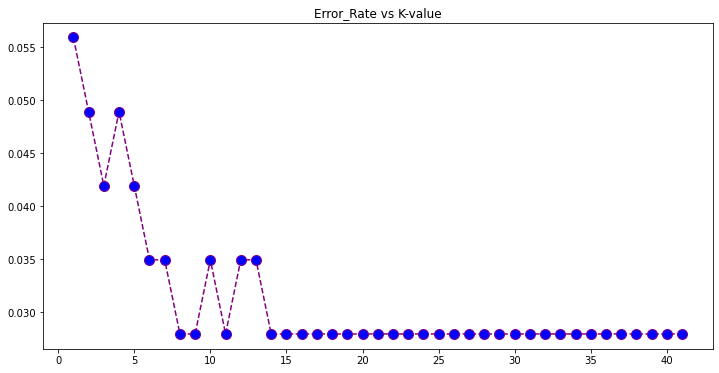

In [101]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [102]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
predictions2 = knn.predict(X_test_scaled)

In [103]:
print(confusion_matrix(y_test, predictions2))

[[89  0]
 [ 4 50]]


In [104]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.93      0.96        54

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [105]:
knn_model_acc = accuracy_score(y_test, predictions2)
knn_model_acc

0.972027972027972

### Task10- Building Decision Tree, Random Forest and SVM Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions) 

In [86]:
models_list = {
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

In [87]:
# Before, sending it to the prediction check the key and values to store it's values in DataFrame below.
print(list(models_list.keys()))
print(list(models_list.values()))

['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [88]:
# Define the function for confusion metric Graphs
def cm_metrix_graph(cm):
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()    

In [89]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train_scaled, X_test_scaled, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        89
           1       0.98      0.91      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        89
           1       1.00      0.91      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



Classification Report of 'SVC '

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           

In [90]:
df_pred

model_name     score  accuracy_score accuracy_percentage
0  RandomForestClassifier  0.995305        0.958042              95.80%
1  DecisionTreeClassifier  1.000000        0.965035              96.50%
2                     SVC  0.988263        0.972028              97.20%

In [91]:
df_pred.sort_values('score', ascending=False)

model_name     score  accuracy_score accuracy_percentage
1  DecisionTreeClassifier  1.000000        0.965035              96.50%
0  RandomForestClassifier  0.995305        0.958042              95.80%
2                     SVC  0.988263        0.972028              97.20%

### Task11- Random Forest with Hyperparameters tuning

In [ ]:
# Pick the model
model = RandomForestClassifier()

In [ ]:
# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

In [ ]:
# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

In [ ]:
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

### Task12- SVM with Hyperparameters tuning

In [ ]:
# Pick the model
model = SVC()

In [ ]:
# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]

In [ ]:
# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

In [ ]:
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

### Task13- K Neighbors Classification with Hyperparameters tuning

In [ ]:
# Pick the model
model = KNeighborsClassifier()

In [ ]:
# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}

In [ ]:
# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

In [ ]:
# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

### Task12- Deploy the best model

In [106]:
import pickle as pkl

In [ ]:
# Trainned Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb'))

Now, You can check your current directory. You can see the file with named "logistic_model.pkl"

In [ ]:
# To read model from file
# load the model from disk

loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)